In [1]:
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/MyDrive/Colab Notebooks/xray.zip" .

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This project's aim is to learn some neural networks concepts and working with in keras and tensorflow with covid19 dataset.

In [2]:
!unzip xray.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/COVID19/COVID19(228).jpg  
  inflating: Data/train/COVID19/COVID19(229).jpg  
  inflating: Data/train/COVID19/COVID19(23).jpg  
  inflating: Data/train/COVID19/COVID19(230).jpg  
  inflating: Data/train/COVID19/COVID19(231).jpg  
  inflating: Data/train/COVID19/COVID19(232).jpg  
  inflating: Data/train/COVID19/COVID19(233).jpg  
  inflating: Data/train/COVID19/COVID19(234).jpg  
  inflating: Data/train/COVID19/COVID19(235).jpg  
  inflating: Data/train/COVID19/COVID19(236).jpg  
  inflating: Data/train/COVID19/COVID19(237).jpg  
  inflating: Data/train/COVID19/COVID19(238).jpg  
  inflating: Data/train/COVID19/COVID19(239).jpg  
  inflating: Data/train/COVID19/COVID19(24).jpg  
  inflating: Data/train/COVID19/COVID19(240).jpg  
  inflating: Data/train/COVID19/COVID19(241).jpg  
  inflating: Data/train/COVID19/COVID19(242).jpg  
  inflating: Data/train/COVID19/COVID19(243).jpg  
  inflating: Data/train/COVID19/C

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras import *
import seaborn as sns

# Q1 : Loading Dataset

In [11]:
dataGenerator = preprocessing.image.ImageDataGenerator(rescale= None)

In [12]:
dataTrain = dataGenerator.flow_from_directory(
    "/content/Data/train",
    target_size=(80,80),
    color_mode ='grayscale',
    batch_size =32,
    class_mode ="categorical"
)

dataTest = dataGenerator.flow_from_directory(
    "/content/Data/test",
    target_size=(80,80),
    color_mode ='grayscale',
    batch_size =32,
    class_mode ="categorical"
)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [13]:
dataTest.samples

1288

# Q2 : Analysis

In [14]:
imgPneumonia = preprocessing.image.load_img(path='/content/Data/train/PNEUMONIA/PNEUMONIA(953).jpg',target_size =(80,80))
imgNormal = preprocessing.image.load_img('Data/train/NORMAL/NORMAL(1136).jpg',target_size =(80,80))
imgCovid = preprocessing.image.load_img('Data/train/COVID19/COVID19(28).jpg',target_size =(80,80))

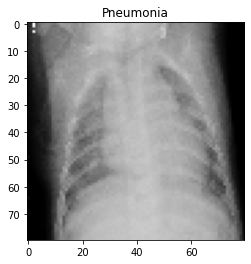

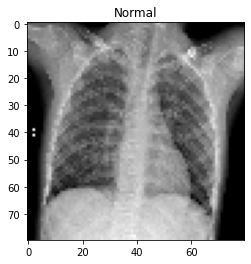

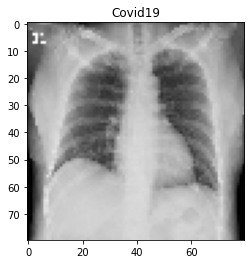

In [15]:
plt.imshow(imgPneumonia)
plt.title('Pneumonia')
plt.show()

plt.imshow(imgNormal)
plt.title('Normal')
plt.show()

plt.imshow(imgCovid)
plt.title('Covid19')
plt.show()

In [16]:
labels = dataTrain.labels

covid = np.count_nonzero(labels == dataTrain.class_indices['COVID19'])
normal = np.count_nonzero(labels == dataTrain.class_indices['NORMAL'])
peneumonia = np.count_nonzero(labels == dataTrain.class_indices['PNEUMONIA'])

<BarContainer object of 1 artists>

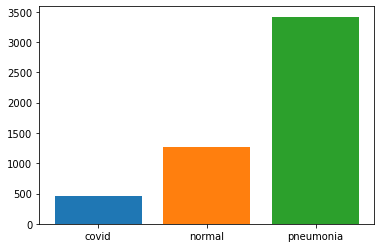

In [17]:
plt.bar('covid',covid)
plt.bar('normal',normal)
plt.bar('pneumonia',peneumonia)

# Q3 : Neural Network model generation

In [4]:
def create_model(activation_function,optimizer_func,loss_func=losses.categorical_crossentropy,regulize_func=None):
  inp = layers.Input(shape=(80,80,1))
  out = layers.Flatten()(inp)
  out = layers.Dense(6400,activation=activation_function,kernel_regularizer=regulize_func)(out)
  out = layers.Dense(4000,activation=activation_function,kernel_regularizer=regulize_func)(out)
  out = layers.Dense(2000,activation=activation_function,kernel_regularizer=regulize_func)(out)
  out = layers.Dense(1024,activation=activation_function,kernel_regularizer=regulize_func)(out)
  out = layers.Dense(2000,activation=activation_function,kernel_regularizer=regulize_func)(out)
  out = layers.Dense(3,activation='softmax',kernel_regularizer=regulize_func)(out)
  model = models.Model(inputs=inp,outputs=out)
  model.compile(optimizer=optimizer_func,loss=loss_func, metrics=['accuracy'])
  return model

In [19]:
model = create_model(activation_function='relu',optimizer_func=optimizers.SGD(learning_rate=0.01))
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 6400)              40966400  
_________________________________________________________________
dense_13 (Dense)             (None, 4000)              25604000  
_________________________________________________________________
dense_14 (Dense)             (None, 2000)              8002000   
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              2049024   
_________________________________________________________________
dense_16 (Dense)             (None, 2000)              2050

In the input a binary picture of 80 * 80 is given.Since this network is a fully connected neural network each layer has  (input data dimension + 1) * number of neurons parameters(
The reason why is increased by 1 is that each neuron has a Bias).

In [5]:
def Plot_history(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

# Q4 : relu vs tanh

In [21]:
model_relu = create_model(activation_function ='relu',optimizer_func=optimizers.SGD(learning_rate=0.01))

In [22]:
history = model_relu.fit(dataTrain,validation_data=dataTest,batch_size=32,epochs=10)

Epoch 1/10
161/161 [==============================] - 146s 902ms/step - loss: nan - accuracy: 0.1224 - val_loss: nan - val_accuracy: 0.0901
Epoch 2/10
161/161 [==============================] - 145s 902ms/step - loss: nan - accuracy: 0.0904 - val_loss: nan - val_accuracy: 0.0901
Epoch 3/10
161/161 [==============================] - 145s 901ms/step - loss: nan - accuracy: 0.0862 - val_loss: nan - val_accuracy: 0.0901
Epoch 4/10
161/161 [==============================] - 146s 905ms/step - loss: nan - accuracy: 0.0930 - val_loss: nan - val_accuracy: 0.0901
Epoch 5/10
161/161 [==============================] - 146s 905ms/step - loss: nan - accuracy: 0.0939 - val_loss: nan - val_accuracy: 0.0901
Epoch 6/10
161/161 [==============================] - 145s 903ms/step - loss: nan - accuracy: 0.0863 - val_loss: nan - val_accuracy: 0.0901
Epoch 7/10
161/161 [==============================] - 145s 904ms/step - loss: nan - accuracy: 0.0875 - val_loss: nan - val_accuracy: 0.0901
Epoch 8/10
161/161 [

In [6]:
def get_labels(data):
  labels = []
  n = int(np.ceil(len(data.classes)/data.batch_size))
  for i in range(n):
    x,y = data.next()
    for label in y:
      labels.append(backend.argmax(label))
  return np.array(labels)

              precision    recall  f1-score   support

           0       0.09      1.00      0.17       116
           1       0.00      0.00      0.00       317
           2       0.00      0.00      0.00       855

    accuracy                           0.09      1288
   macro avg       0.03      0.33      0.06      1288
weighted avg       0.01      0.09      0.01      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


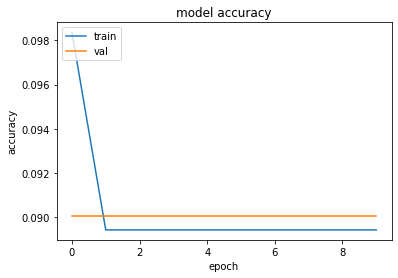

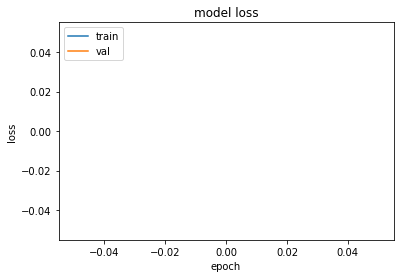

In [24]:
labels = get_labels(dataTest)
predict_labels_relu = model_relu.predict(dataTest)
print(classification_report(labels,backend.argmax(predict_labels_relu).numpy()))
Plot_history(history)

Relu's range is from 0 to infinity and its derivative is either 0 or 1. When relu is used without normalizing loss values grows and since the derivative of the function is 1 in most cases accuracy will not grow in back propagation.

In [25]:
model_tanh = create_model(activation_function ='tanh',optimizer_func=optimizers.SGD(learning_rate=0.01))
history = model_tanh.fit(dataTrain,validation_data=dataTest,batch_size=32,epochs=10)
labels = get_labels(dataTest)
predict_labels_tanh = model_tanh.predict(dataTest)
print(classification_report(labels,backend.argmax(predict_labels_tanh).numpy()))

Epoch 1/10
161/161 [==============================] - 143s 887ms/step - loss: 1.4756 - accuracy: 0.5788 - val_loss: 0.8672 - val_accuracy: 0.6638
Epoch 2/10
161/161 [==============================] - 142s 882ms/step - loss: 0.8414 - accuracy: 0.6569 - val_loss: 0.8439 - val_accuracy: 0.6638
Epoch 3/10
161/161 [==============================] - 142s 885ms/step - loss: 0.8343 - accuracy: 0.6613 - val_loss: 0.8088 - val_accuracy: 0.6638
Epoch 4/10
161/161 [==============================] - 142s 882ms/step - loss: 0.8442 - accuracy: 0.6635 - val_loss: 0.8620 - val_accuracy: 0.6638
Epoch 5/10
161/161 [==============================] - 142s 881ms/step - loss: 0.8286 - accuracy: 0.6688 - val_loss: 0.8615 - val_accuracy: 0.6638
Epoch 6/10
161/161 [==============================] - 141s 880ms/step - loss: 0.8361 - accuracy: 0.6654 - val_loss: 0.8551 - val_accuracy: 0.6638
Epoch 7/10
161/161 [==============================] - 142s 880ms/step - loss: 0.8374 - accuracy: 0.6603 - val_loss: 0.8396 -

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


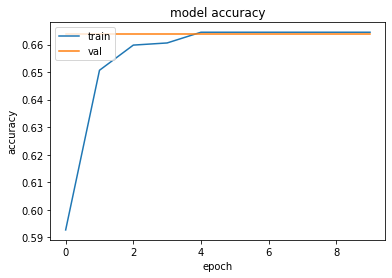

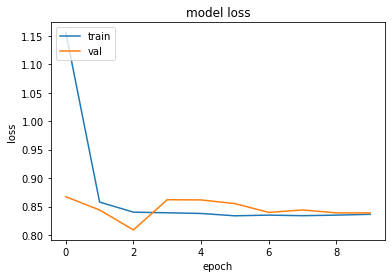

In [26]:
Plot_history(history)

Tanh and its derivative has a range from -1 to 1 and 0 to 1 respectively.Therefore, loss values won't grow as it happens in relue.

Both of these networks predict all samples to one class and ignore other classes. Tanh is sensitive to values around zero but our data varies from 0 to 255 on the other hand relue gives large values for large data. As a result,the problem of low accuracy can be solved with normalizing data.




# Q5 : Normalization

In [8]:
dataGenerator = preprocessing.image.ImageDataGenerator(rescale= 1.0/255.0)
dataTrain = dataGenerator.flow_from_directory(
    "/content/Data/train",
    target_size=(80,80),
    color_mode ='grayscale',
    batch_size =32,
    class_mode ="categorical"
)

dataTest = dataGenerator.flow_from_directory(
    "/content/Data/test",
    target_size=(80,80),
    color_mode ='grayscale',
    batch_size =32,
    class_mode ="categorical"
)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [28]:
model = create_model(activation_function ='relu',optimizer_func=optimizers.SGD(learning_rate=0.01))
history = model.fit(dataTrain,validation_data=dataTest,batch_size=32,epochs=10)
labels = get_labels(dataTest)
predict_labels= model.predict(dataTest)
print(classification_report(labels,backend.argmax(predict_labels).numpy()))

Epoch 1/10
161/161 [==============================] - 143s 886ms/step - loss: 0.6792 - accuracy: 0.7049 - val_loss: 0.3301 - val_accuracy: 0.8804
Epoch 2/10
161/161 [==============================] - 142s 886ms/step - loss: 0.4097 - accuracy: 0.8401 - val_loss: 0.2851 - val_accuracy: 0.8882
Epoch 3/10
161/161 [==============================] - 142s 884ms/step - loss: 0.3846 - accuracy: 0.8462 - val_loss: 0.2490 - val_accuracy: 0.9076
Epoch 4/10
161/161 [==============================] - 141s 878ms/step - loss: 0.2964 - accuracy: 0.8920 - val_loss: 0.1890 - val_accuracy: 0.9348
Epoch 5/10
161/161 [==============================] - 141s 878ms/step - loss: 0.2703 - accuracy: 0.8967 - val_loss: 0.3872 - val_accuracy: 0.8339
Epoch 6/10
161/161 [==============================] - 141s 875ms/step - loss: 0.2886 - accuracy: 0.8863 - val_loss: 0.1837 - val_accuracy: 0.9332
Epoch 7/10
161/161 [==============================] - 141s 878ms/step - loss: 0.2274 - accuracy: 0.9114 - val_loss: 0.2218 -

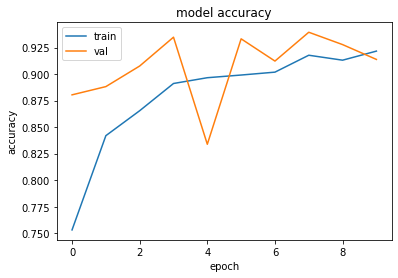

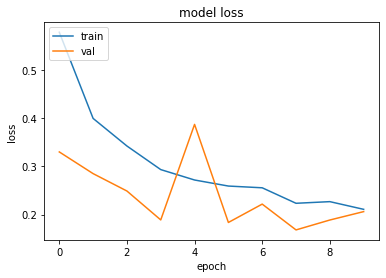

In [29]:
Plot_history(history)

# Q6 : Optimizers

What momentum is? momentum is a constant beta between zero and one which attaches to steps as follows $step(n)= b* step(n-1) +b^2* step(n-2)+...$ .This way we are getting an average of previous steps which help us to get over local optimums.



Epoch 1/10
161/161 [==============================] - 142s 884ms/step - loss: 0.6311 - accuracy: 0.7321 - val_loss: 0.6056 - val_accuracy: 0.7104
Epoch 2/10
161/161 [==============================] - 142s 881ms/step - loss: 0.3496 - accuracy: 0.8621 - val_loss: 0.3152 - val_accuracy: 0.8703
Epoch 3/10
161/161 [==============================] - 141s 877ms/step - loss: 0.2770 - accuracy: 0.8959 - val_loss: 0.1920 - val_accuracy: 0.9286
Epoch 4/10
161/161 [==============================] - 141s 877ms/step - loss: 0.2595 - accuracy: 0.9057 - val_loss: 0.1684 - val_accuracy: 0.9394
Epoch 5/10
161/161 [==============================] - 141s 877ms/step - loss: 0.2521 - accuracy: 0.9017 - val_loss: 0.2471 - val_accuracy: 0.9076
Epoch 6/10
161/161 [==============================] - 141s 877ms/step - loss: 0.2469 - accuracy: 0.8994 - val_loss: 0.2066 - val_accuracy: 0.9185
Epoch 7/10
161/161 [==============================] - 141s 877ms/step - loss: 0.2100 - accuracy: 0.9149 - val_loss: 0.3426 -

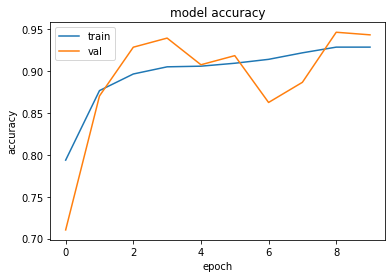

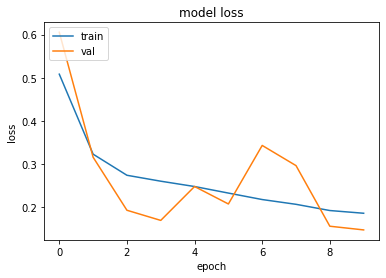

In [30]:
model = create_model(activation_function ='relu',optimizer_func=optimizers.SGD(learning_rate=0.01,momentum =0.5))
history = model.fit(dataTrain,validation_data=dataTest,batch_size=32,epochs=10)
labels = get_labels(dataTest)
predict_labels= model.predict(dataTest)
print(classification_report(labels,backend.argmax(predict_labels).numpy()))
Plot_history(history)

Epoch 1/10
161/161 [==============================] - 145s 902ms/step - loss: 0.6125 - accuracy: 0.7402 - val_loss: 0.2561 - val_accuracy: 0.9014
Epoch 2/10
161/161 [==============================] - 143s 889ms/step - loss: 0.3195 - accuracy: 0.8828 - val_loss: 0.2985 - val_accuracy: 0.8913
Epoch 3/10
161/161 [==============================] - 142s 882ms/step - loss: 0.3019 - accuracy: 0.8828 - val_loss: 0.4262 - val_accuracy: 0.8129
Epoch 4/10
161/161 [==============================] - 141s 878ms/step - loss: 0.2888 - accuracy: 0.8875 - val_loss: 0.3030 - val_accuracy: 0.8742
Epoch 5/10
161/161 [==============================] - 141s 876ms/step - loss: 0.2366 - accuracy: 0.9120 - val_loss: 0.1804 - val_accuracy: 0.9325
Epoch 6/10
161/161 [==============================] - 141s 880ms/step - loss: 0.2223 - accuracy: 0.9181 - val_loss: 0.3063 - val_accuracy: 0.8665
Epoch 7/10
161/161 [==============================] - 142s 882ms/step - loss: 0.2243 - accuracy: 0.9133 - val_loss: 0.2271 -

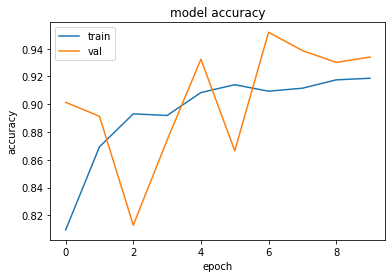

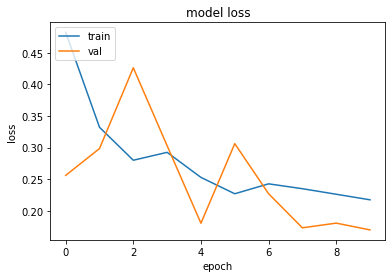

In [31]:
model = create_model(activation_function ='relu',optimizer_func=optimizers.SGD(learning_rate=0.01,momentum =0.9))
history = model.fit(dataTrain,validation_data=dataTest,batch_size=32,epochs=10)
labels = get_labels(dataTest)
predict_labels= model.predict(dataTest)
print(classification_report(labels,backend.argmax(predict_labels).numpy()))
Plot_history(history)

Epoch 1/10
161/161 [==============================] - 146s 900ms/step - loss: 0.7367 - accuracy: 0.6744 - val_loss: 0.4937 - val_accuracy: 0.7888
Epoch 2/10
161/161 [==============================] - 144s 896ms/step - loss: 0.6856 - accuracy: 0.7554 - val_loss: 0.4344 - val_accuracy: 0.8890
Epoch 3/10
161/161 [==============================] - 143s 892ms/step - loss: 1.5428 - accuracy: 0.6687 - val_loss: 0.8567 - val_accuracy: 0.6638
Epoch 4/10
161/161 [==============================] - 143s 892ms/step - loss: 0.9157 - accuracy: 0.6309 - val_loss: 1.0529 - val_accuracy: 0.6638
Epoch 5/10
161/161 [==============================] - 143s 889ms/step - loss: 0.9089 - accuracy: 0.6556 - val_loss: 0.8390 - val_accuracy: 0.6638
Epoch 6/10
161/161 [==============================] - 144s 896ms/step - loss: 0.8479 - accuracy: 0.6762 - val_loss: 0.8466 - val_accuracy: 0.6638
Epoch 7/10
161/161 [==============================] - 143s 891ms/step - loss: 0.8413 - accuracy: 0.6671 - val_loss: 0.8414 -

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


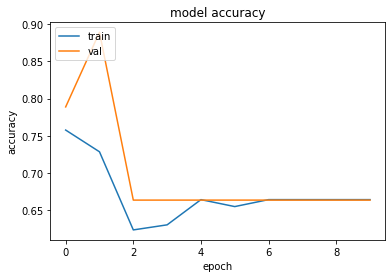

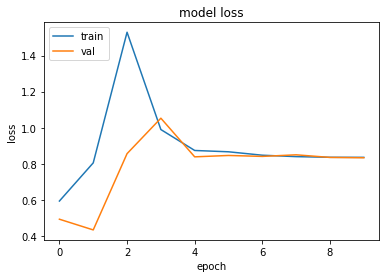

In [10]:
model = create_model(activation_function ='relu',optimizer_func=optimizers.SGD(learning_rate=0.01,momentum =0.99))
history = model.fit(dataTrain,validation_data=dataTest,batch_size=32,epochs=10)
labels = get_labels(dataTest)
predict_labels= model.predict(dataTest)
print(classification_report(labels,backend.argmax(predict_labels).numpy()))
Plot_history(history)

From above diagrams, it is evident that bigger momentum (from 0.5 to 0.9) resulted in faster convergence but when the momentum is too large it does not reach a optimum and perform worse than SGD without a momentum. It feels like the model was converging to an optimum but missed it and made everything worse.




With large momentum, it is possible to miss the global optimum and pass through it. It's impact is like a large learning rate causing the us to jump over the global optimum continuously. 

Epoch 1/10
161/161 [==============================] - 145s 898ms/step - loss: 2.9081 - accuracy: 0.6669 - val_loss: 0.2558 - val_accuracy: 0.9068
Epoch 2/10
161/161 [==============================] - 144s 892ms/step - loss: 0.3750 - accuracy: 0.8549 - val_loss: 0.2213 - val_accuracy: 0.9185
Epoch 3/10
161/161 [==============================] - 144s 893ms/step - loss: 0.3387 - accuracy: 0.8817 - val_loss: 0.2632 - val_accuracy: 0.8913
Epoch 4/10
161/161 [==============================] - 143s 893ms/step - loss: 0.2900 - accuracy: 0.8929 - val_loss: 0.1899 - val_accuracy: 0.9270
Epoch 5/10
161/161 [==============================] - 144s 893ms/step - loss: 0.2718 - accuracy: 0.9089 - val_loss: 0.1954 - val_accuracy: 0.9200
Epoch 6/10
161/161 [==============================] - 144s 894ms/step - loss: 0.2840 - accuracy: 0.8928 - val_loss: 0.2026 - val_accuracy: 0.9402
Epoch 7/10
161/161 [==============================] - 144s 897ms/step - loss: 0.2647 - accuracy: 0.9042 - val_loss: 0.1641 -

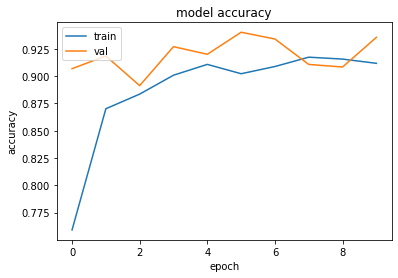

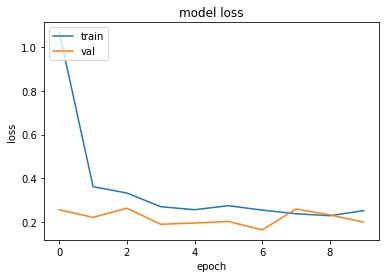

In [11]:
model = create_model(activation_function ='relu',optimizer_func=optimizers.Adam())
history = model.fit(dataTrain,validation_data=dataTest,batch_size=32,epochs=10)
labels = get_labels(dataTest)
predict_labels= model.predict(dataTest)
print(classification_report(labels,backend.argmax(predict_labels).numpy()))
Plot_history(history)

SGD with momentum of 0.9 converges faster to an optimum but unfortuantly it then gets lower in accuracy and higher in loss.In Adam ,however, with a fast convergence at first and slower later on ,model reaches an optimum and it seems that it is getting better and better.

# Q7 : Epoches impact

Epoch 1/20
161/161 [==============================] - 142s 883ms/step - loss: 3.2384 - accuracy: 0.6648 - val_loss: 0.3357 - val_accuracy: 0.8804
Epoch 2/20
161/161 [==============================] - 142s 884ms/step - loss: 0.4114 - accuracy: 0.8390 - val_loss: 0.2688 - val_accuracy: 0.8975
Epoch 3/20
161/161 [==============================] - 142s 882ms/step - loss: 0.3021 - accuracy: 0.8917 - val_loss: 0.2003 - val_accuracy: 0.9301
Epoch 4/20
161/161 [==============================] - 141s 879ms/step - loss: 0.2940 - accuracy: 0.8918 - val_loss: 0.2183 - val_accuracy: 0.9286
Epoch 5/20
161/161 [==============================] - 142s 879ms/step - loss: 0.2821 - accuracy: 0.9031 - val_loss: 0.1835 - val_accuracy: 0.9325
Epoch 6/20
161/161 [==============================] - 142s 881ms/step - loss: 0.2517 - accuracy: 0.9045 - val_loss: 0.2278 - val_accuracy: 0.9262
Epoch 7/20
161/161 [==============================] - 142s 880ms/step - loss: 0.2492 - accuracy: 0.9148 - val_loss: 0.1839 -

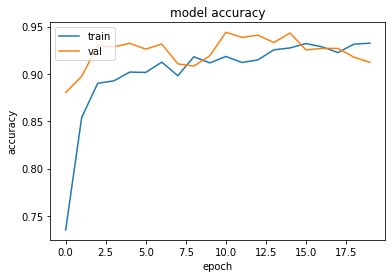

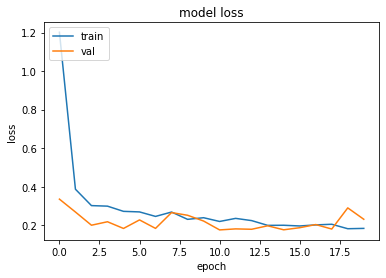

In [12]:
model = create_model(activation_function ='relu',optimizer_func=optimizers.Adam())
history = model.fit(dataTrain,validation_data=dataTest,batch_size=32,epochs=20)
labels = get_labels(dataTest)
predict_labels= model.predict(dataTest)
print(classification_report(labels,backend.argmax(predict_labels).numpy()))
Plot_history(history)

Epoche is a number of times all training data goes forward and backward in a model. Optimization methods like gradient descent needs to perform several passes to train a good model.<br>
The more the number of epoches, the more weights are adjusted ;therefore, resulting in better performance.However, too many epoches might lead to overfitting.<br>
On the other hand,in problems which are not that complex, one epoch can do well,and having more number of epoches will result in overfitting. Overfitting can be tackled with changing other parameters, if not wanting to change number of epoches.

# Q8 : Loss Functions

Epoch 1/20
161/161 [==============================] - 145s 896ms/step - loss: 0.2225 - accuracy: 0.6505 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 2/20
161/161 [==============================] - 146s 905ms/step - loss: 0.2275 - accuracy: 0.6587 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 3/20
161/161 [==============================] - 144s 897ms/step - loss: 0.2256 - accuracy: 0.6617 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 4/20
161/161 [==============================] - 145s 901ms/step - loss: 0.2308 - accuracy: 0.6538 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 5/20
161/161 [==============================] - 144s 898ms/step - loss: 0.2331 - accuracy: 0.6504 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 6/20
161/161 [==============================] - 145s 900ms/step - loss: 0.2288 - accuracy: 0.6568 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 7/20
161/161 [==============================] - 144s 899ms/step - loss: 0.2293 - accuracy: 0.6561 - val_loss: 0.2241 -

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


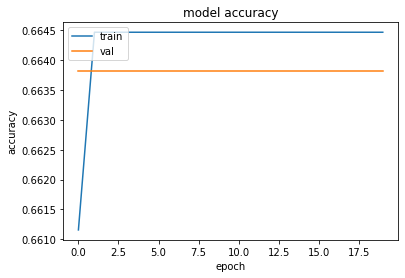

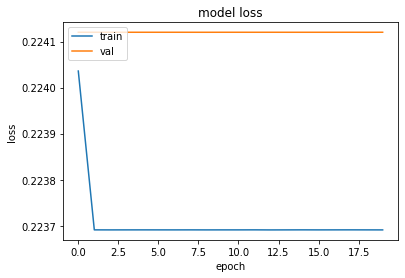

In [9]:
model = create_model(activation_function ='relu',optimizer_func=optimizers.Adam(),loss_func=losses.mse)
history = model.fit(dataTrain,validation_data=dataTest,batch_size=32,epochs=20)
labels = get_labels(dataTest)
predict_labels= model.predict(dataTest)
print(classification_report(labels,backend.argmax(predict_labels).numpy()))
Plot_history(history)

Above diagrams demonstrate that when using MSE, model does not learn anything.It does not know why and how it classifies different inputs wrong.

MSE is the sum of squared distances between our target variable and predicted values. In classification problems it does not make any sense to compute difference between classes.When model is predicting red but the target value is blue ,is not worse than predicting green ;so calculating distance is not logical.<br>
This calculations are usefull when working with regression problems where distance have a meaning and predicting 2 instead of 3 is not as bad as predicting 10 instead of 3.

# Q9 : Regularization

Epoch 1/20
161/161 [==============================] - 153s 943ms/step - loss: 4.2808 - accuracy: 0.6358 - val_loss: 1.0171 - val_accuracy: 0.9022
Epoch 2/20
161/161 [==============================] - 153s 950ms/step - loss: 1.0506 - accuracy: 0.8671 - val_loss: 0.7694 - val_accuracy: 0.9045
Epoch 3/20
161/161 [==============================] - 153s 952ms/step - loss: 0.8041 - accuracy: 0.8908 - val_loss: 0.6790 - val_accuracy: 0.8967
Epoch 4/20
161/161 [==============================] - 153s 950ms/step - loss: 0.6868 - accuracy: 0.8937 - val_loss: 0.6250 - val_accuracy: 0.8913
Epoch 5/20
161/161 [==============================] - 153s 954ms/step - loss: 0.6076 - accuracy: 0.8994 - val_loss: 0.4893 - val_accuracy: 0.9278
Epoch 6/20
161/161 [==============================] - 153s 955ms/step - loss: 0.5541 - accuracy: 0.9046 - val_loss: 0.4849 - val_accuracy: 0.9061
Epoch 7/20
161/161 [==============================] - 154s 956ms/step - loss: 0.4978 - accuracy: 0.9061 - val_loss: 0.3984 -

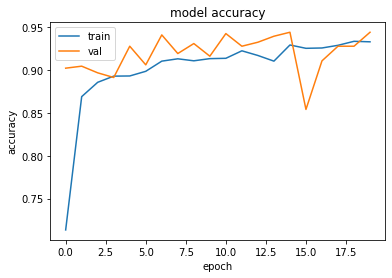

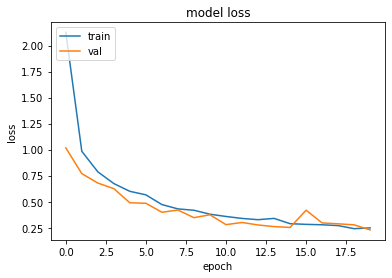

In [10]:
model = create_model(activation_function ='relu',optimizer_func=optimizers.Adam(),regulize_func=regularizers.L2(l2=.0001))
history = model.fit(dataTrain,validation_data=dataTest,batch_size=32,epochs=20)
labels = get_labels(dataTest)
predict_labels= model.predict(dataTest)
print(classification_report(labels,backend.argmax(predict_labels).numpy()))
Plot_history(history)

When NN models are complex, it is possible for them to overfit. Regularization is a technique to prevent that overfit.<br>
By looking at above diagrams, we will notice that our model has performed better on our validation data in comparison to train data which is because of using regularization.

Epoch 1/20
161/161 [==============================] - 156s 967ms/step - loss: 3.6172 - accuracy: 0.6276 - val_loss: 0.3404 - val_accuracy: 0.8859
Epoch 2/20
161/161 [==============================] - 154s 959ms/step - loss: 0.4279 - accuracy: 0.8390 - val_loss: 0.3723 - val_accuracy: 0.8486
Epoch 3/20
161/161 [==============================] - 155s 960ms/step - loss: 0.3642 - accuracy: 0.8713 - val_loss: 0.2324 - val_accuracy: 0.8967
Epoch 4/20
161/161 [==============================] - 155s 961ms/step - loss: 0.3146 - accuracy: 0.8827 - val_loss: 0.2578 - val_accuracy: 0.9045
Epoch 5/20
161/161 [==============================] - 153s 952ms/step - loss: 0.3138 - accuracy: 0.8848 - val_loss: 0.1994 - val_accuracy: 0.9270
Epoch 6/20
161/161 [==============================] - 154s 957ms/step - loss: 0.2927 - accuracy: 0.8917 - val_loss: 0.2315 - val_accuracy: 0.9185
Epoch 7/20
161/161 [==============================] - 154s 960ms/step - loss: 0.2993 - accuracy: 0.8935 - val_loss: 0.2540 -

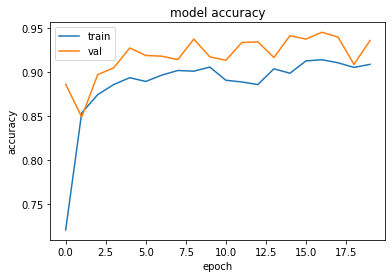

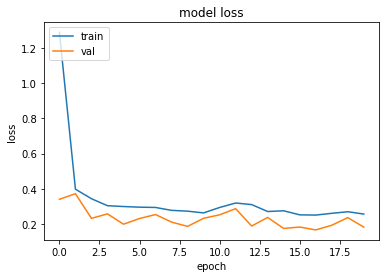

In [11]:

inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(6400,activation='relu')(out)
out = layers.Dropout(rate = 0.1)(out)
out = layers.Dense(4000,activation='relu')(out)
out = layers.Dropout(rate = 0.1)(out)
out = layers.Dense(2000,activation='relu')(out)
out = layers.Dropout(rate = 0.1)(out)
out = layers.Dense(1024,activation='relu')(out)
out = layers.Dropout(rate = 0.1)(out)
out = layers.Dense(2000,activation='relu')(out)
out = layers.Dropout(rate = 0.1)(out)
out = layers.Dense(3,activation='softmax')(out)
model = models.Model(inputs=inp,outputs=out)
model.compile(optimizer=optimizers.Adam(),loss=losses.categorical_crossentropy, metrics=['accuracy'])
history = model.fit(dataTrain,validation_data=dataTest,batch_size=32,epochs=20)
labels = get_labels(dataTest)
predict_labels= model.predict(dataTest)
print(classification_report(labels,backend.argmax(predict_labels).numpy()))
Plot_history(history)

In dropout each at each epoch some of the nuerons turn off and others learn to work without them. This why valdiation and train sets from above diagram have similiar patterns of going up and down.<br>
This technique is used to prevent overfitting and have a better generalized model.